<a href="https://colab.research.google.com/github/armandordorica/APS1070_Project3_PCA/blob/master/Project_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3, APS1070 Summer 2020
#### **PCA -  20 points**
**Deadline: July 12, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Armando Ordorica
*   **Student number**: 100 559 2164


In this project we are working on an up-to-date COVID19 dataset. The dataset reports the number of total cases for different countries at the end of each day.

Data url: https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import bokeh
import pandas as pd
rawdf = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv',
    index_col=0,
    thousands=','
)

# Part 1: Geting started [4 Marks]

1. Plot time-series for the `US`, `China`, ` Canada`, and 17 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. - done
2. Apply `StandardScalar` to the dataframe. Each day should have a `mean` of zero and `StD` of 1.
3. Plot the standardized time-series for the same countries in `step 1`.
4. Explain the trend of standardized time-series for the `US`, `Canada`, and `China`. Why does the curve goes up or down? What do negative and positive values mean? 
5. What other patterns do you see in other countries? (e.g., oscillations, monotonic increase or decrease, other trends)

In [ ]:
df = rawdf.loc[['Canada', 'US', 'China', 'Mexico', 'Brazil', 'Italy', 'Spain', 'France', 'United Kingdom','India', 'Turkey', 'Peru', 'Germany', 'Australia', 'New Zealand', 'Argentina', 'Chile']]

In [ ]:
x = list(df.T.index)

In [ ]:
rawdf.loc[['Canada', 'China', 'US']]

22-Jan  23-Jan  24-Jan  25-Jan  ...   15-Jun   16-Jun   17-Jun   18-Jun
Countries                                  ...                                    
Canada          0       0       0       0  ...   100763   101087   101491   101877
China         548     643     920    1406  ...    84378    84422    84458    84494
US              1       1       2       2  ...  2114026  2137731  2163290  2191052

[3 rows x 149 columns]

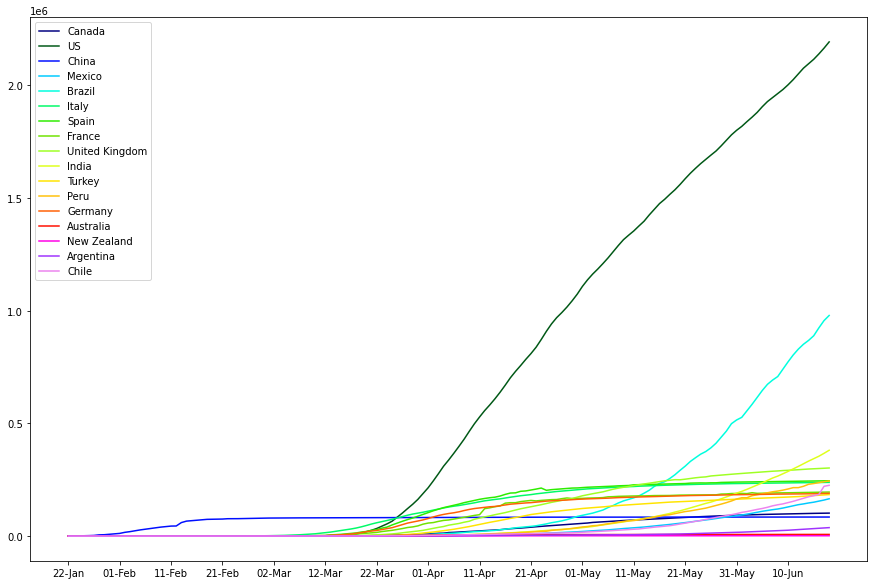

In [ ]:
import matplotlib.cm as cm

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,17)]     

plt.figure(figsize=(15,10))
plt.xticks(np.arange(0,len(df.T),10), df.T.index[0:len(df.T):10])
ys = []
for i in range(0, len(df)): 
  ys.append(list(df.iloc[i]))
  plt.plot(x, ys[i], label=df.iloc[i].name, color=colorst[i])
  plt.legend()

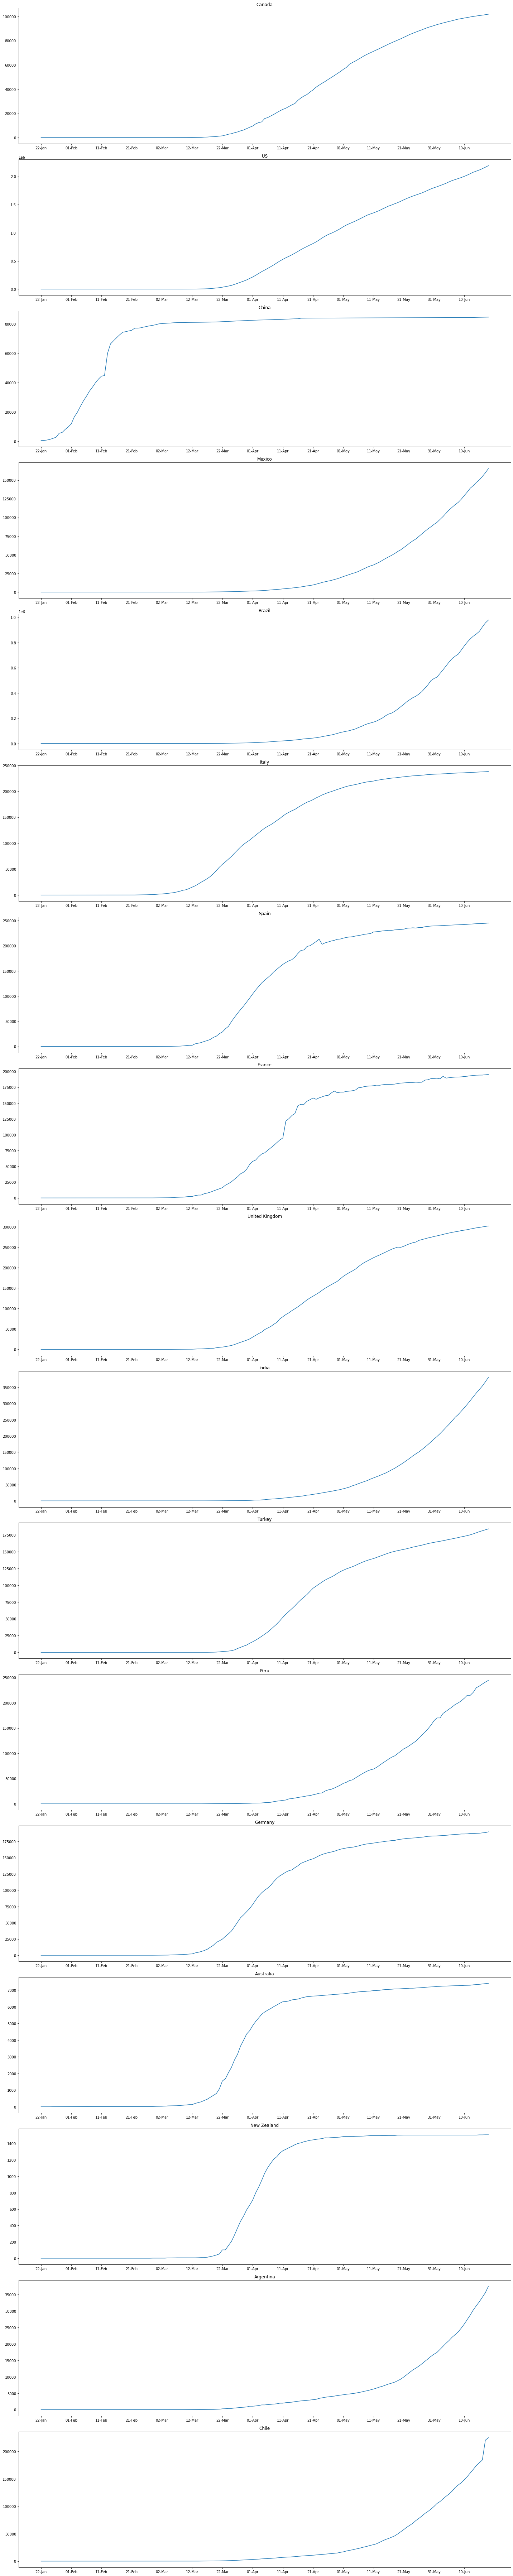

In [ ]:
fig, axs = plt.subplots(len(df), figsize=(20,100))
# fig.set_size_inches(25, 30) 
fig.subplots_adjust(hspace=3)

ys = []
for i in range(0, len(df)): 
  ys.append(list(df.iloc[i]))
  axs[i].set_title(df.iloc[i].name)
  axs[i].set_xticks(np.arange(0,len(df.T),10))
  axs[i].plot(x, ys[i])

# plt.xticks(np.arange(0,len(df.T),10), df.T.index[0:len(df.T):10])

fig.tight_layout()



**Apply StandardScalar to the dataframe. Each day should have a mean of zero and StD of 1.**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_features = StandardScaler().fit_transform(df.values)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)


Text(0.5, 1.0, 'Means')

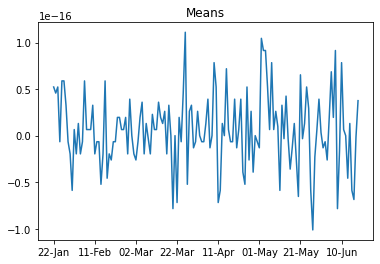

In [ ]:
scaled_features_df.mean().plot()
plt.title("Means")

In [ ]:
def round_two_places(x):
  return round(x,2)

In [ ]:
print("Standard deviations are around 1")
std_devs = list(map(round_two_places, list(scaled_features_df.std())))

Standard deviations are around 1


In [ ]:
np.mean(std_devs)

1.03

### **Plot the standardized time-series for the same countries in step 1.**
* **Zero mean and unit variance for each day**

In [ ]:
for i in range(0, len(list(scaled_features_df.columns))):
  print("Mean:{}, Variance:{}".format(scaled_features_df[list(scaled_features_df.columns)[i]].mean(), scaled_features_df[list(scaled_features_df.columns)[i]].std()))

Mean:5.224578939412501e-17, Variance:1.030776406404415
Mean:4.5715065719859385e-17, Variance:1.030776406404416
Mean:5.224578939412501e-17, Variance:1.0307764064044151
Mean:-6.530723674265627e-18, Variance:1.0307764064044147
Mean:5.877651306839064e-17, Variance:1.0307764064044147
Mean:5.877651306839064e-17, Variance:1.030776406404415
Mean:3.2653618371328135e-17, Variance:1.0307764064044154
Mean:-6.530723674265627e-18, Variance:1.0307764064044145
Mean:-1.959217102279688e-17, Variance:1.030776406404415
Mean:-5.877651306839064e-17, Variance:1.0307764064044151
Mean:6.530723674265627e-18, Variance:1.0307764064044154
Mean:-1.959217102279688e-17, Variance:1.0307764064044147
Mean:1.3061447348531253e-17, Variance:1.0307764064044154
Mean:-1.959217102279688e-17, Variance:1.0307764064044156
Mean:-6.530723674265627e-18, Variance:1.0307764064044156
Mean:5.877651306839064e-17, Variance:1.0307764064044151
Mean:6.530723674265627e-18, Variance:1.030776406404415
Mean:6.530723674265627e-18, Variance:1.0307

In [ ]:
scaled_features_df.head()

22-Jan    23-Jan    24-Jan  ...    16-Jun    17-Jun    18-Jun
Countries                                ...                              
Canada    -0.250484 -0.250413 -0.251154  ... -0.456871 -0.463879 -0.466313
US        -0.242728 -0.243803 -0.241913  ...  3.655126  3.640583  3.633044
China      3.999993  3.999995  3.999982  ... -0.490517 -0.497787 -0.500422
Mexico    -0.250484 -0.250413 -0.251154  ... -0.348296 -0.347817 -0.341561
Brazil    -0.250484 -0.250413 -0.251154  ...  1.202958  1.235968  1.253085

[5 rows x 149 columns]

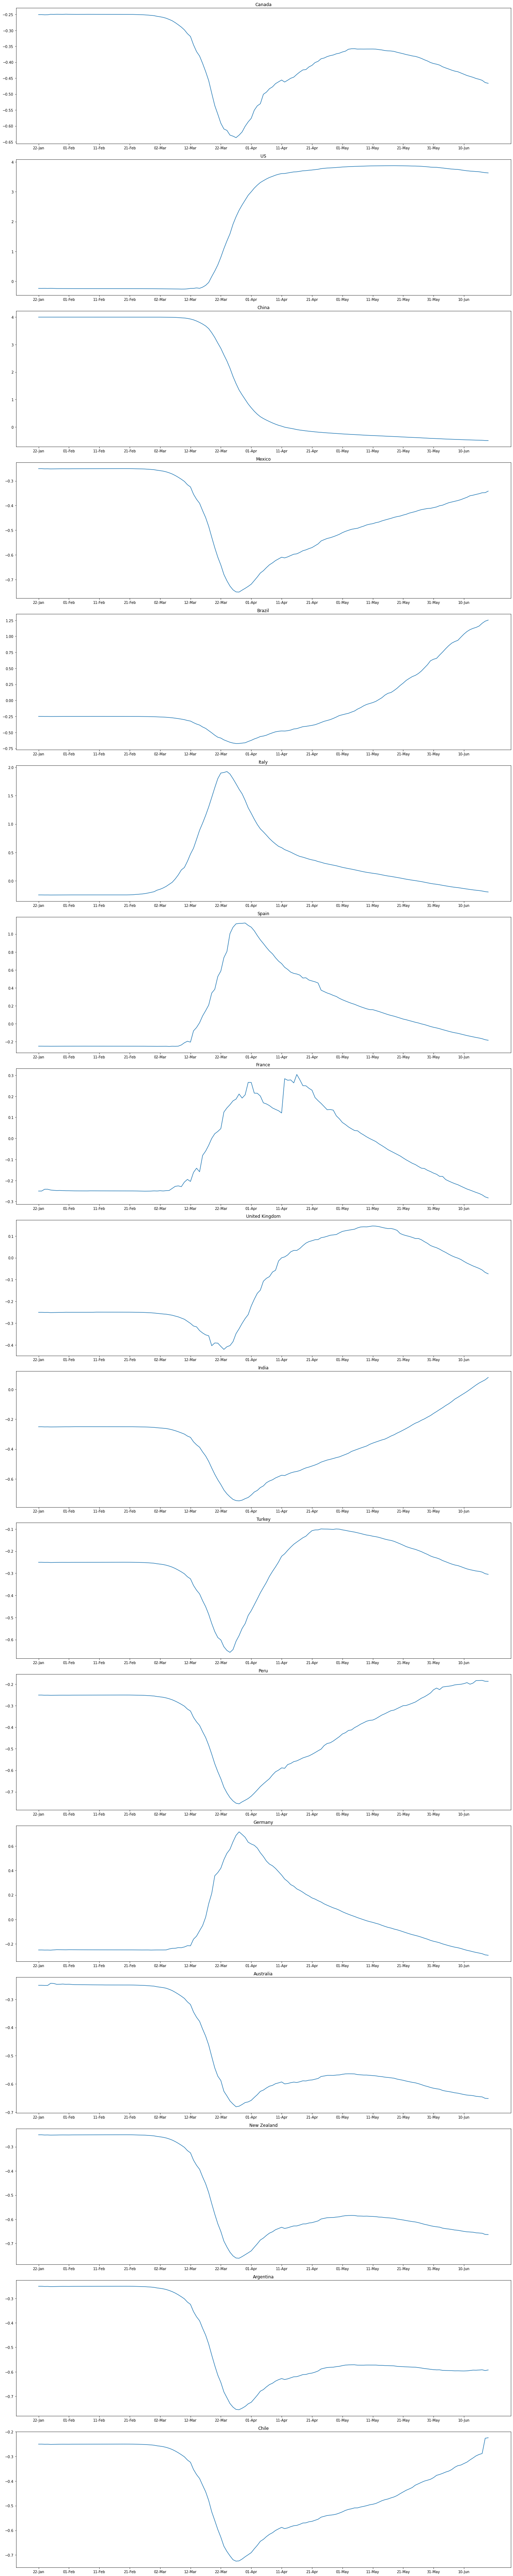

In [ ]:
scaled_features_df

fig, axs = plt.subplots(len(scaled_features_df), figsize=(20,100))
# fig.set_size_inches(25, 30) 
fig.subplots_adjust(hspace=3)

ys = []
for i in range(0, len(df)): 
  ys.append(list(scaled_features_df.iloc[i]))
  axs[i].set_title(scaled_features_df.iloc[i].name)
  axs[i].set_xticks(np.arange(0,len(scaled_features_df.T),10))
  axs[i].plot(x, ys[i])

# plt.xticks(np.arange(0,len(df.T),10), df.T.index[0:len(df.T):10])

fig.tight_layout()



* **Explain the trend of standardized time-series for the US, Canada, and China. Why does the curve goes up or down? What do negative and positive values mean?**
The standardizer will force all values to be zero mean and unit variance along each day. Since China started early with the high number of cases and the number of cases in other countries were virtually zero at that time (i.e. Jan and Feb), the scaler will force the other countries to have negative values such that the mean for the whole list remains at 0. 
By the same token, for example the US had more than 1 million cases by May 11th, whereas Canada and China had around 70-80k. 
A country will have positive values for a day if their daily number of cases is higher than the average of the rest of the countries for a given day. 

### **What other patterns do you see in other countries? (e.g., oscillations, monotonic increase or decrease, other trends)**

A country will have positive values for a day if their daily number of cases is higher than the average of the rest of the countries for a given day. 
Countries with a clear "mountain" shape are the ones that at some point reached the top in terms of number of cases (much higher than average). 

# Part 2: Applying PCA [6 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your Cov matrix should be (149, 149).*
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`.
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. How many PCs do you need to cover 99\% of the dataset's variance?
4. Show the first 10 principal components (Eigenvectors) plotted as a time series.
5. Based on your knowledge of the dataset contents, can you explain what any of the principal components might represent?

### **1. Compute the covariance matrix of the dataframe. Hint: The dimensions of your Cov matrix should be (149, 149).**

In [ ]:
np_scaled_features_df = np.array(scaled_features_df)

In [ ]:
np_scaled_features_df[:,0].mean(), np_scaled_features_df[:,0].var() 

(1.3061447348531253e-17, 0.9999999999999998)

In [ ]:
n, m = np_scaled_features_df.shape

In [ ]:
n,m

(17, 149)

In [ ]:
C = np.dot(np_scaled_features_df.T, np_scaled_features_df) / (n-1) 


In [ ]:
C.shape

(149, 149)

### **2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`.**

In [ ]:
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Eig Vec:
  [[ 0.00281553+0.j         -0.12585852+0.j          0.05082148+0.j
  ... -0.09201436+0.j         -0.02746544-0.02016744j
  -0.02746544+0.02016744j]
 [ 0.00284403+0.j         -0.12585873+0.j          0.05079921+0.j
  ... -0.0011738 +0.j          0.00109265+0.00275614j
   0.00109265-0.00275614j]
 [ 0.00277761+0.j         -0.12586262+0.j          0.05069519+0.j
  ...  0.01765057+0.j          0.02373574-0.01090646j
   0.02373574+0.01090646j]
 ...
 [-0.10328292+0.j          0.0167623 +0.j          0.12678217+0.j
  ...  0.03901305+0.j          0.00283106+0.01704917j
   0.00283106-0.01704917j]
 [-0.10273536+0.j          0.0171074 +0.j          0.12996145+0.j
  ... -0.07840634+0.j          0.01678108-0.01698998j
   0.01678108+0.01698998j]
 [-0.10245721+0.j          0.0172516 +0.j          0.13163668+0.j
  ...  0.11565331+0.j          0.01420196-0.00916724j
   0.01420196+0.00916724j]]  
 Eig Val: 
 [ 8.47357253e+01+0.00000000e+00j  6.58747348e+01+0.00000000e+00j
  6.45472918e+00+0.000

* **As we can see, eigenvalues are just 149 but eigenvectors are 149x149 matrices (because num_features = 149 (days)).**
* **Eigenvectors here are the columns not the rows. For example, first column corresponds to first eigenvector.**

In [ ]:
eigenValues.shape

(149,)

In [ ]:
eigenVectors.shape

(149, 149)

### **3. Show the effectiveness of your principal components in covering the variance of the dataset with a scree plot. How many PCs do you need to cover 99% of the dataset's variance?**

The first three eigenvectors are able to explain 99.21% of the variance. 

In [ ]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [ ]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 53.52434284+0.00000000e+00j,  95.13491361+0.00000000e+00j,
        99.21212115+0.00000000e+00j,  99.89724866+0.00000000e+00j,
        99.9868976 +0.00000000e+00j,  99.9963794 +0.00000000e+00j,
        99.99789676+0.00000000e+00j,  99.99913497+0.00000000e+00j,
        99.99950708+0.00000000e+00j,  99.99973684+0.00000000e+00j,
        99.99986203+0.00000000e+00j,  99.99993553+0.00000000e+00j,
        99.99997612+0.00000000e+00j,  99.99998879+0.00000000e+00j,
        99.99999868+0.00000000e+00j, 100.        +0.00000000e+00j,
       100.        +0.00000000e+00j, 100.        +0.00000000e+00j,
       100.        +3.98491969e-16j, 100.        +0.00000000e+00j,
       100.        +1.36860536e-15j, 100.        +0.00000000e+00j,
       100.        +0.00000000e+00j, 100.        +3.71163430e-16j,
       100.        +0.00000000e+00j, 100.        +0.00000000e+00j,
       100.        +4.48354208e-16j, 100.        +0.00000000e+00j,
       100.        +2.44984823e-16j, 100.        +0.00000000e+

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


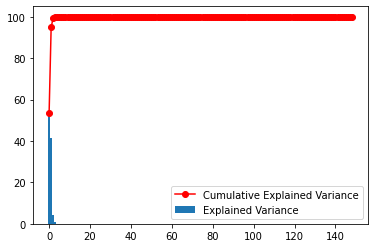

In [ ]:
plt.bar(range(149), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
cumExpVar[0:10]

array([53.52434284+0.j, 95.13491361+0.j, 99.21212115+0.j, 99.89724866+0.j,
       99.9868976 +0.j, 99.9963794 +0.j, 99.99789676+0.j, 99.99913497+0.j,
       99.99950708+0.j, 99.99973684+0.j])

### **4. Show the first 10 principal components (Eigenvectors) plotted as a time series.**

In [ ]:
ys = []
for i in range(0, 10): 
  ys.append(eigenVectors[i])

In [ ]:
len(ys[0])

149

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

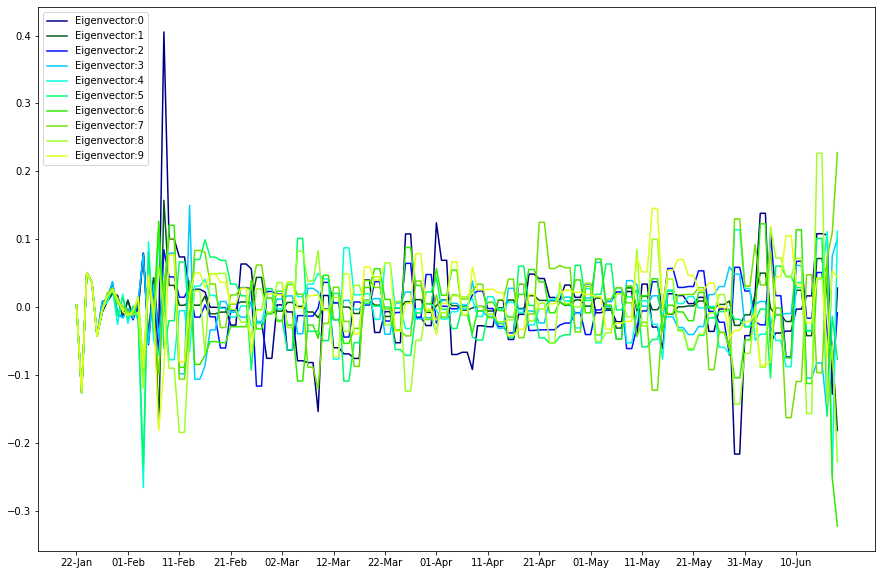

In [ ]:
import matplotlib.cm as cm

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,17)]  

plt.figure(figsize=(15,10))

plt.xticks(np.arange(0,len(scaled_features_df.T),10), scaled_features_df.T.index[0:len(scaled_features_df.T):10])

ys = []
for i in range(0, 10): 
  ys.append(eigenVectors[i])
  plt.plot(x, ys[i], label="Eigenvector:{}".format(i), color=colorst[i])
  plt.legend()

(10, 149)

### **5. Based on your knowledge of the dataset contents, can you explain what any of the principal components might represent?**
The `k` eigenvectors are the ones that are necessary to "tell" the story of the full timeseries. Here our features are the number of days so if we go from 149 to 10, that means that we only need 10 days to explain the overall timeseries.

# Part 3: Data reconstruction [6 Marks]

Implement a function that:


*   Accepts a country name as an input
*   Plots the standardized time-series for it. 
*   Shows the incremental reconstruction for the first 10 principal components (10 plots each showing the standard time-series and your reconstruction). 
*   For each incremental reconstruction step, plots the residual error of reconstruction compared to the original sample (standardized time-series) and a title that states the RMSE of the reconstruction.
* Computes how many PCs are needed so that RMSE would be less than 1\% of data reconstruction with only the first principal component. (e.g., if the RMSE for the first principal component is 4000, we want to know how many PC we need so that RMSE would be less than 40.)

To summarize, your function should print $1+10+10=21$ plots, and report the number of PCs to get less than 1\% RMSE error.

Test your function with the `US`, `Canada`, and `China`.



In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from math import sqrt

def get_num_components_for_lte_1pc_rmse(country_name): 
  X_std=np.array(scaled_features_df.loc[country_name])
  y_actual = X_std

  PC_count = 1
  W = eigenVectors[:, 0:PC_count]
  projX = np.dot(X_std, W)
  ReconX = np.dot(projX, W.T) 

  y_predicted = ReconX.real
  initial_rms = round(sqrt(mean_squared_error(y_actual, y_predicted)),4)

  initial_rms_threshold = initial_rms*0.01

  rms_list = []

  i = 1
  while True: 
      PC_count = i
      W = eigenVectors[:, 0:PC_count]
      projX = np.dot(X_std, W)
      ReconX = np.dot(projX, W.T)

      y_predicted = ReconX.real
      rms_list.append(sqrt(mean_squared_error(y_actual, y_predicted)))
      if round(sqrt(mean_squared_error(y_actual, y_predicted)),4) < initial_rms_threshold: 
        return(i)
        break 
      i+=1



def plot_country(country_name):
  num_components = get_num_components_for_lte_1pc_rmse(country_name)
  print("Number of PCs to get less than 1% RMSE error:{}".format(num_components))

  plt.figure(figsize=(8,5))
  plt.xticks(np.arange(0,len(scaled_features_df.T),20), scaled_features_df.T.index[0:len(scaled_features_df.T):20])
  plt.plot(scaled_features_df.loc[country_name])
  plt.title("Standardized time series from original data for {}".format(country_name))

  X_std=np.array(scaled_features_df.loc[country_name])

  y_actual = X_std

  #print("Number of PCs to get less than 1% RMSE error:{}".format(num_components))

  for i in range(1, 11): 
    PC_count = i
    W = eigenVectors[:, 0:PC_count]
    projX = np.dot(X_std, W)
    ReconX = np.dot(projX, W.T)

    y_predicted = ReconX.real
    
    residual_error = y_actual - y_predicted
    rms = round(sqrt(mean_squared_error(y_actual, y_predicted)),4)
    
    plt.figure(figsize=(8,5))
    plt.plot(X_std, label="Standardized time series from original data", linestyle='dashed')
    plt.plot(ReconX, label="Reconstructed data")
    plt.title("Reconstruction with {} eigenvectors. Root Mean Squared Error:{}".format(i, rms))
    plt.legend()


    plt.figure(figsize=(8,5))
    plt.plot(residual_error, label="Residual error")
    plt.title("Residual error for {} eigenvectors. Root Mean Squared Error:{}".format(i, rms))
    plt.legend()




Number of PCs to get less than 1% RMSE error:6


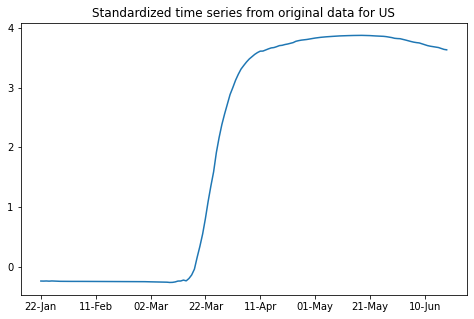

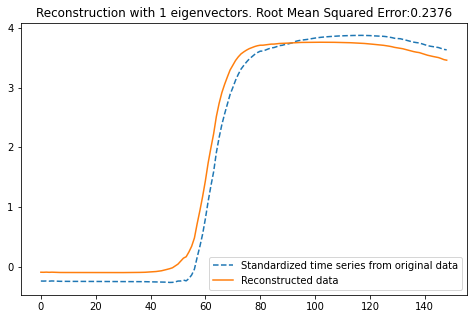

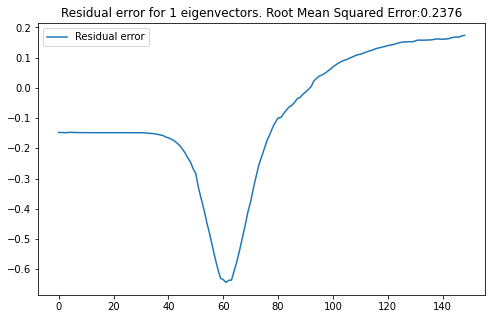

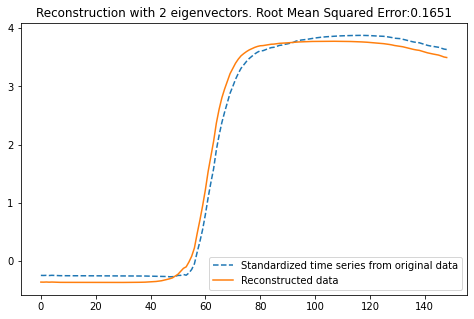

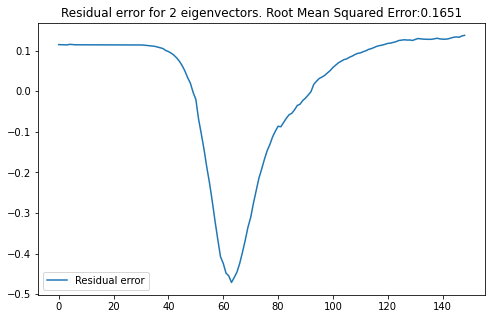

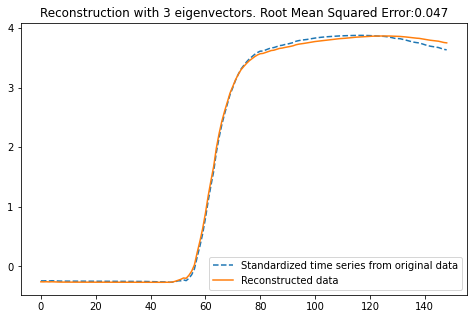

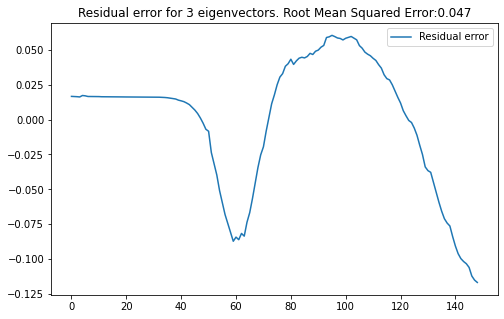

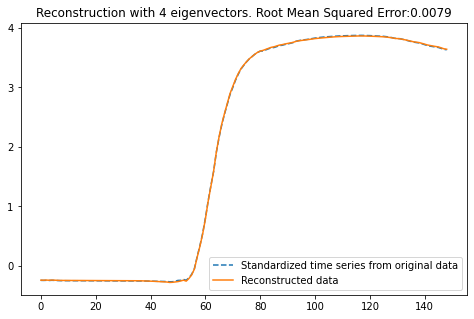

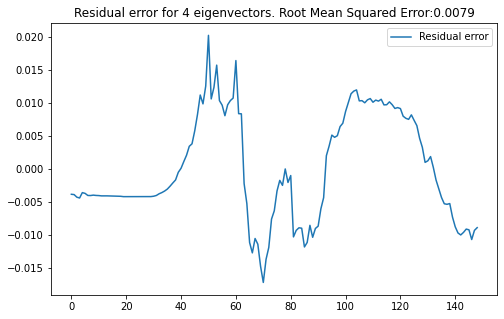

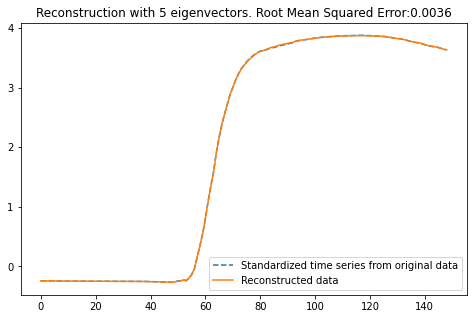

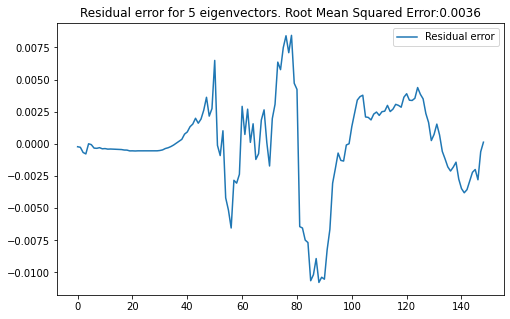

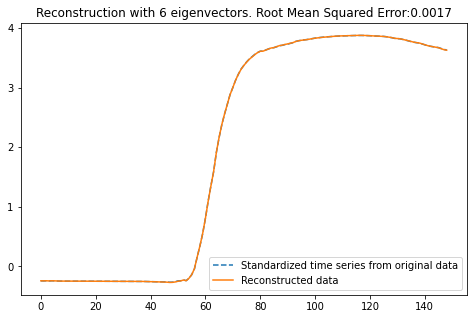

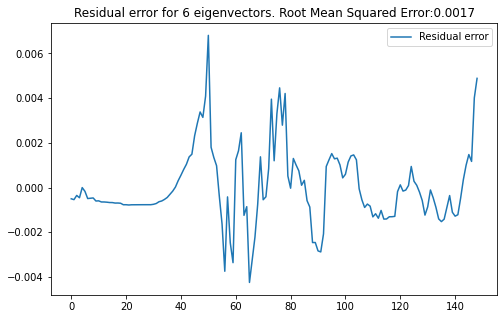

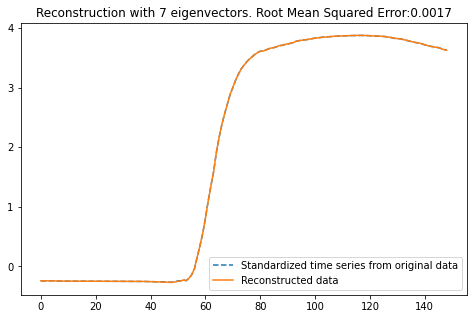

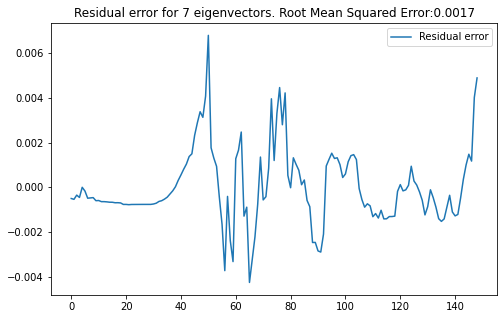

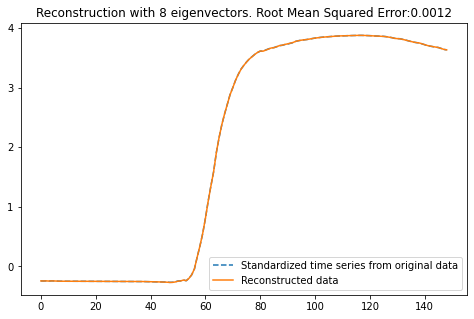

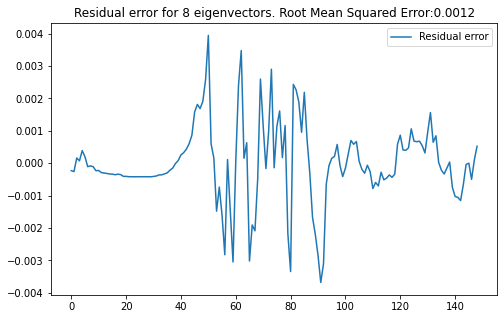

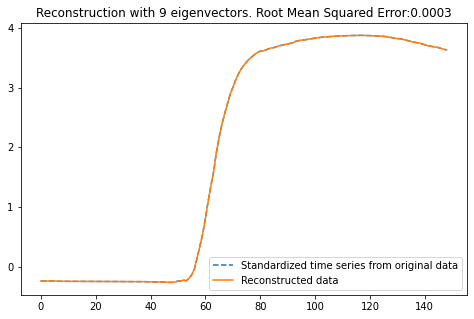

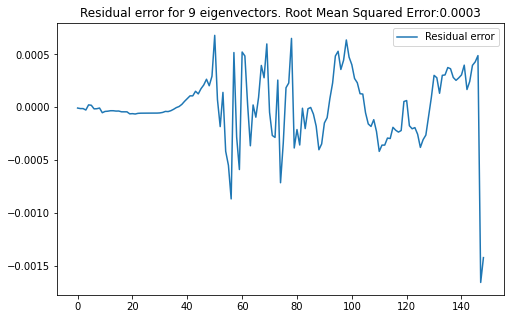

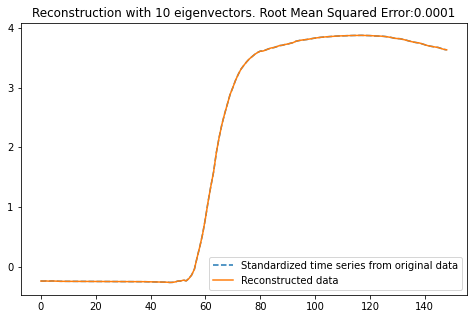

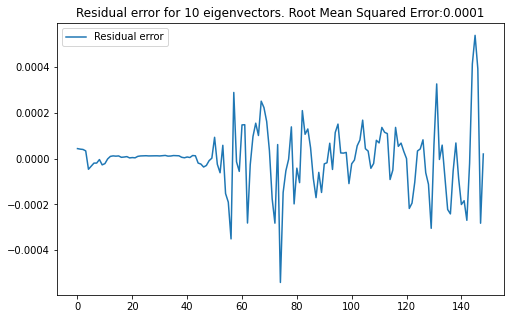

In [ ]:
plot_country('US')

Number of PCs to get less than 1% RMSE error:3


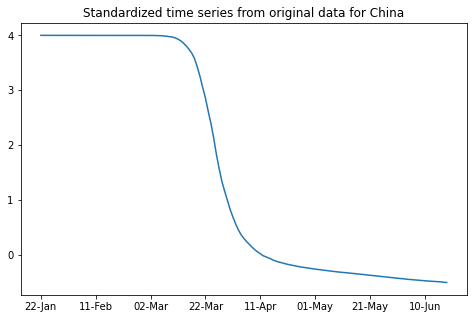

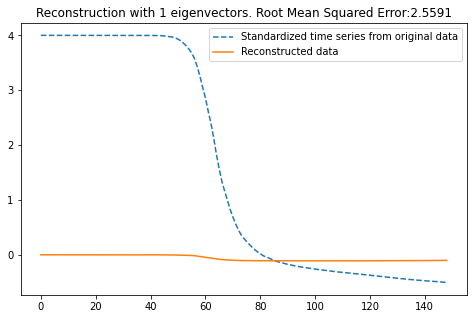

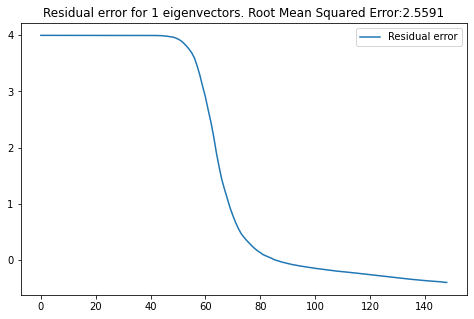

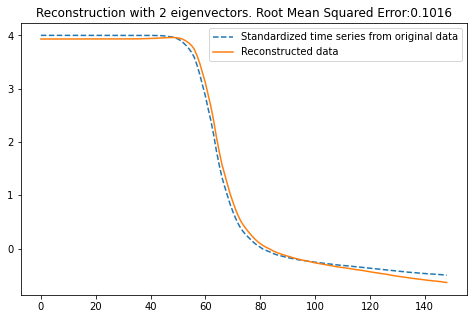

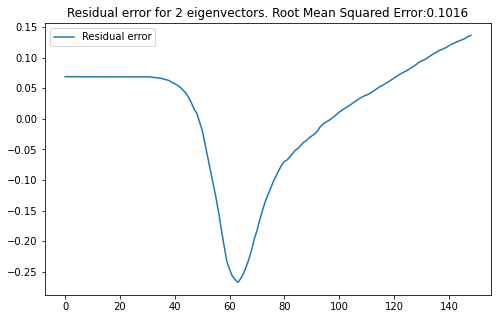

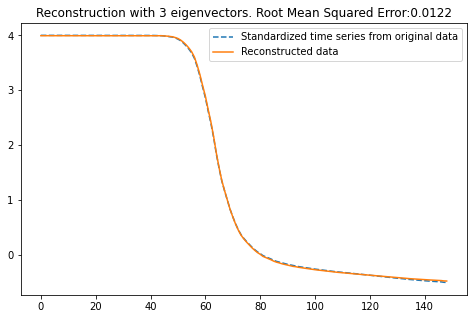

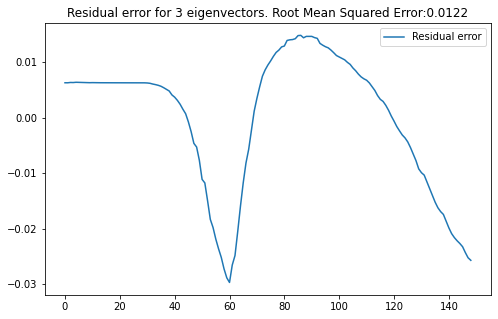

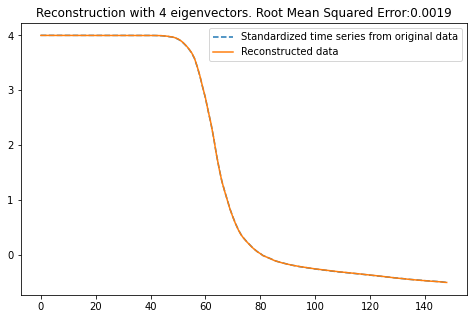

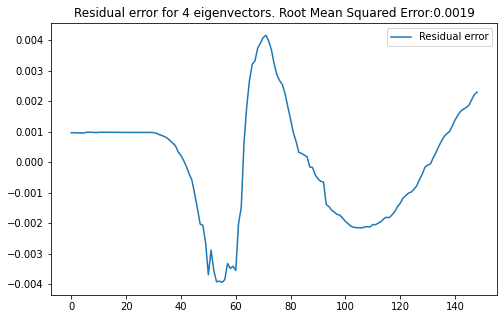

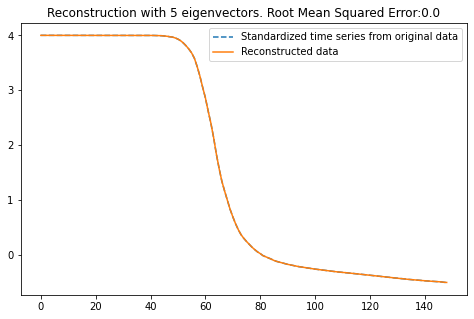

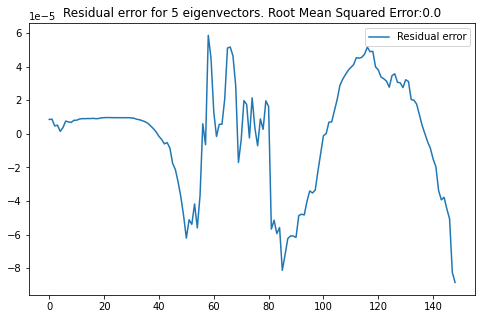

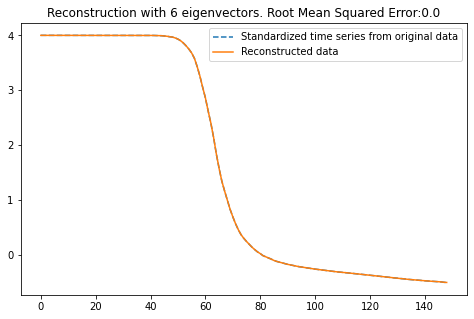

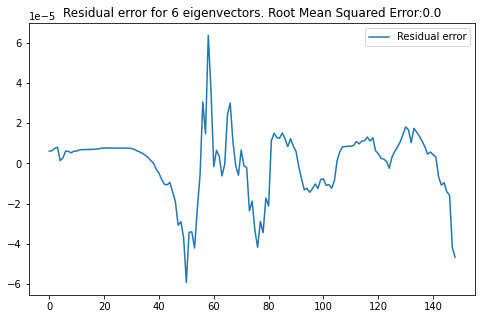

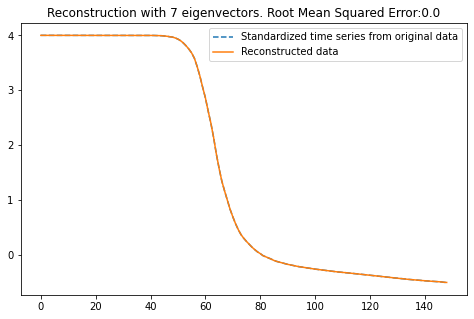

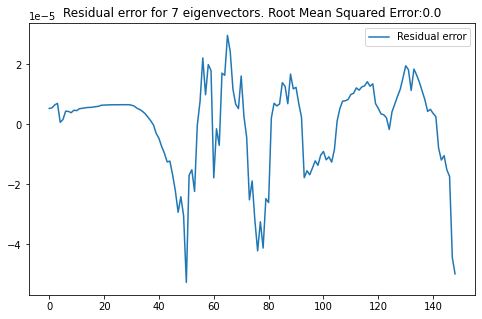

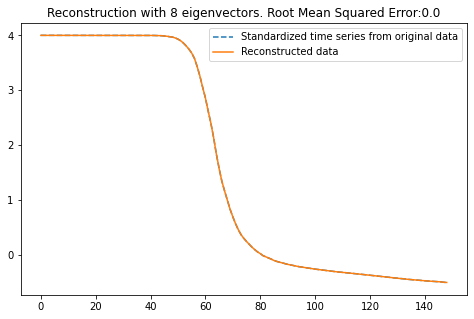

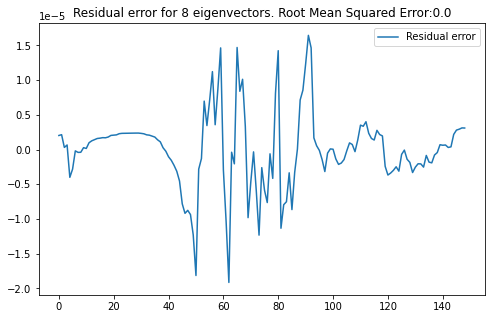

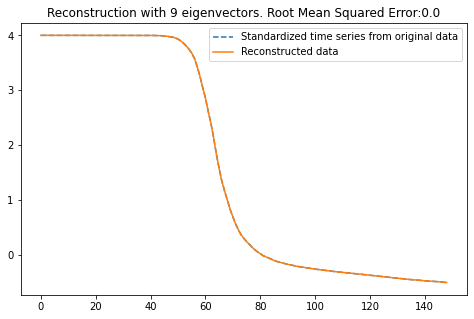

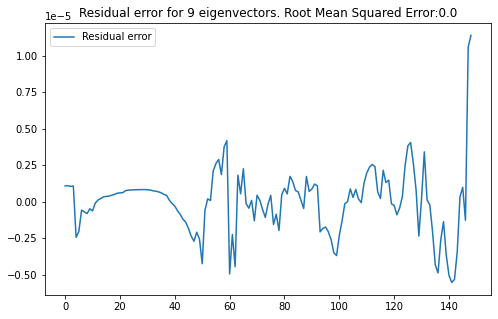

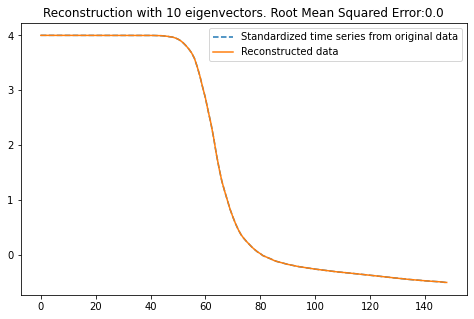

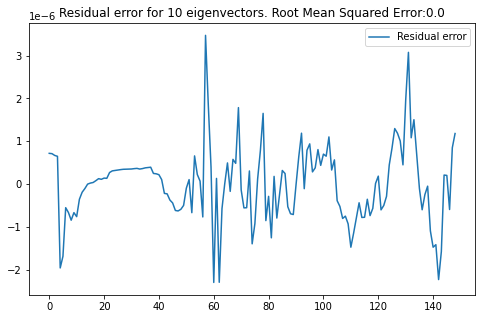

In [ ]:
plot_country('China')

Number of PCs to get less than 1% RMSE error:13


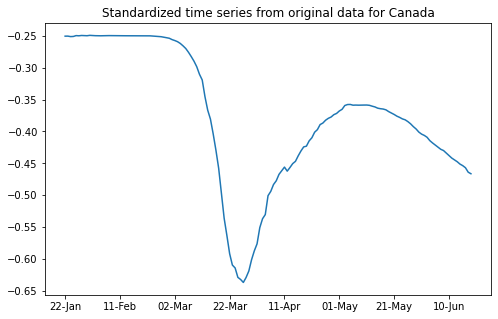

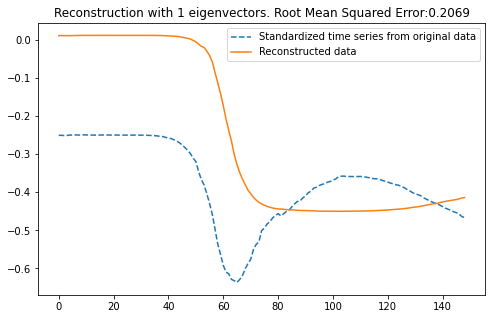

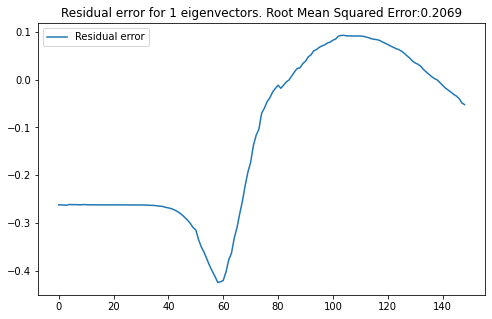

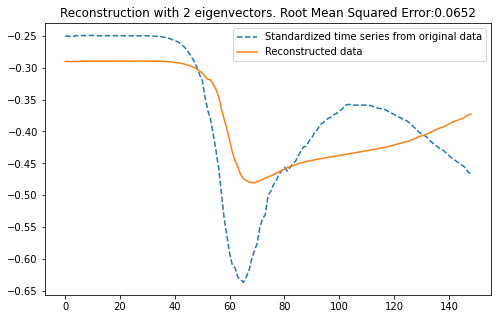

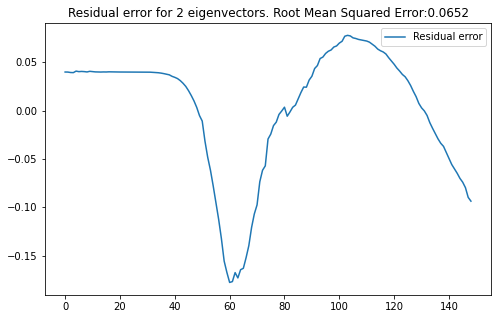

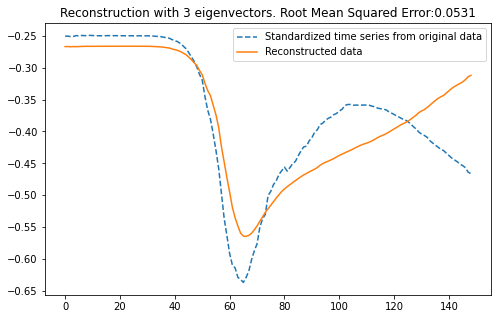

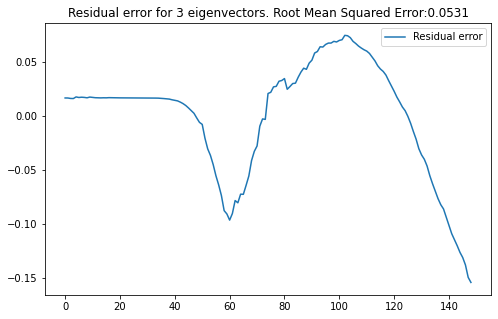

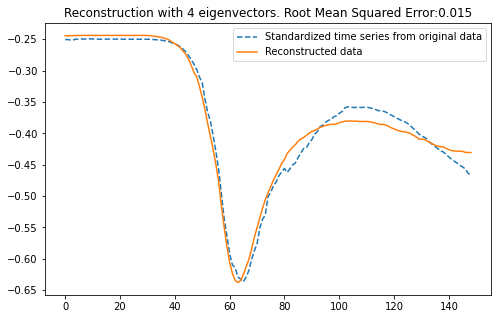

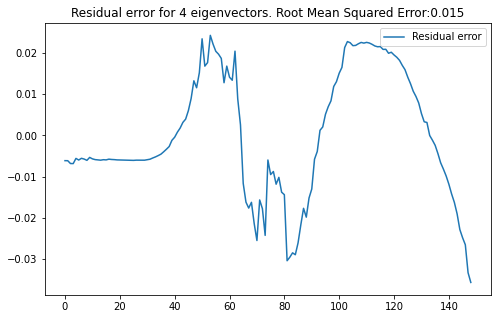

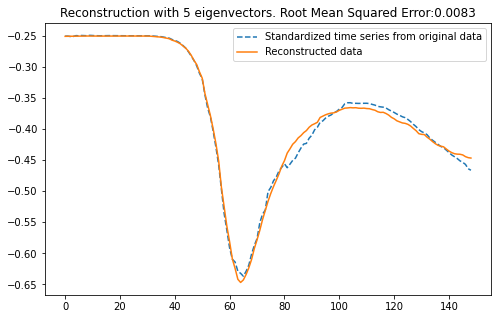

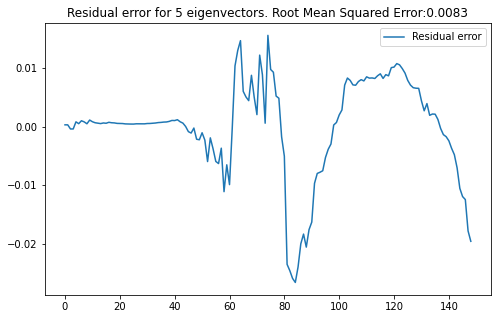

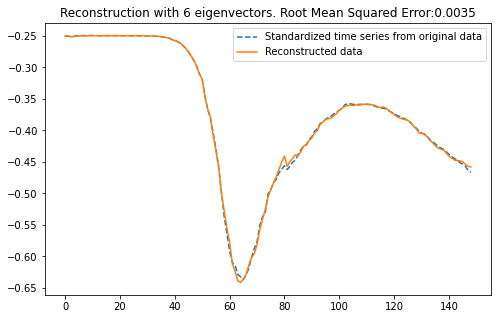

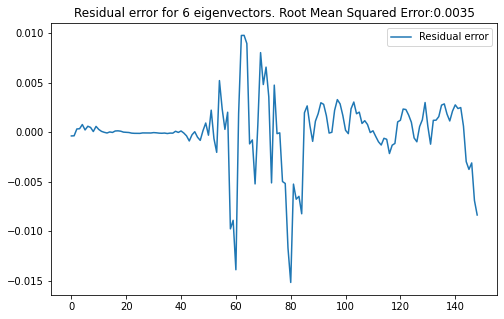

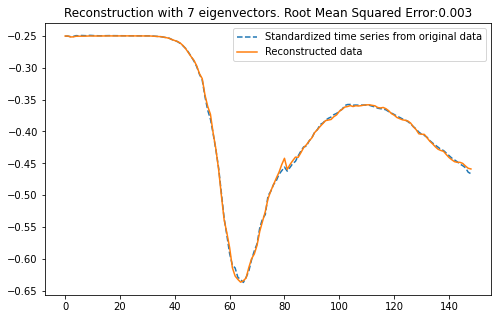

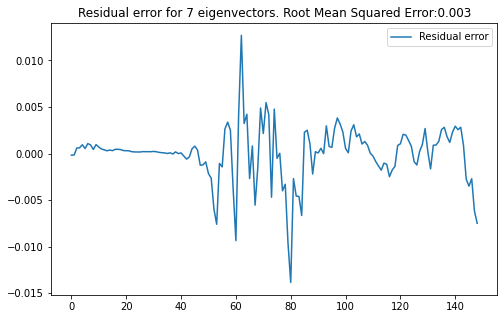

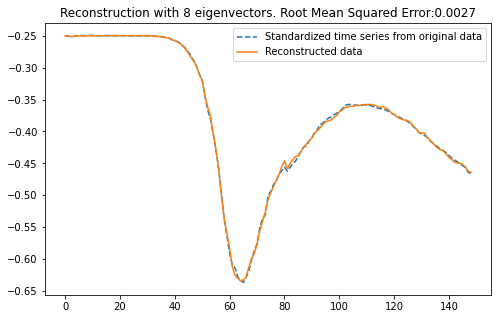

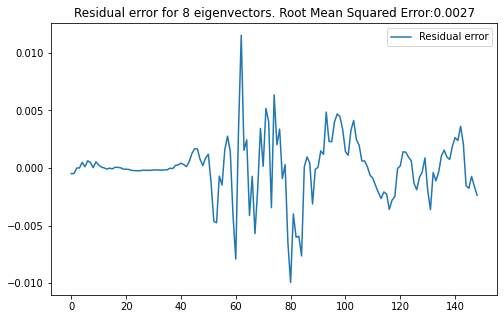

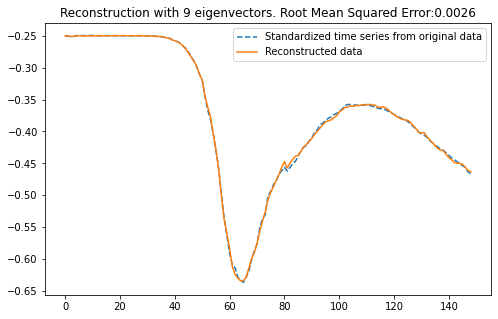

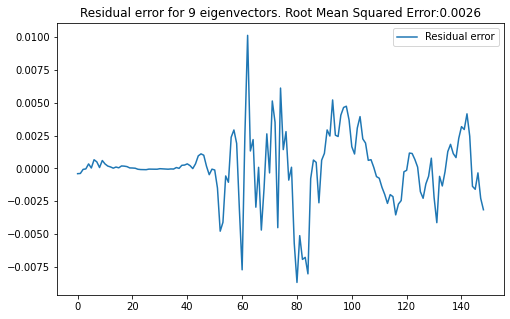

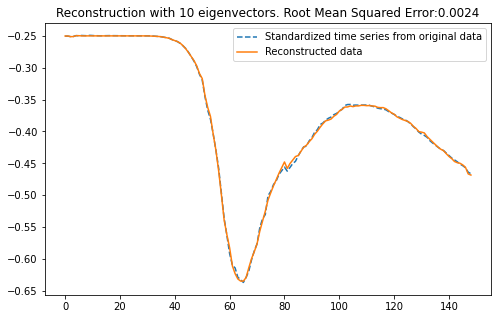

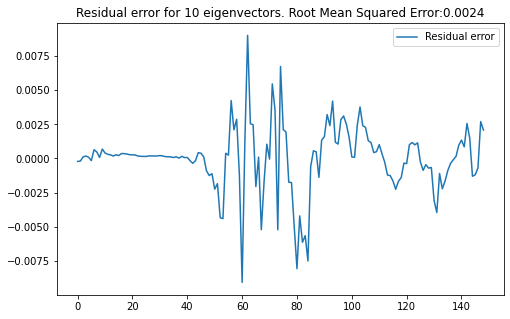

In [ ]:
plot_country('Canada')

# Part 4: Predicting the future! [4 Marks]
Come up with a way to estimate the number of new cases in the near future (like a week) using PCA.


*   One suggestion: You already saw that the first few PCs are the most useful ones and their trend is not that random! Try to predict the eigenvector values for the near future and reconstruct the data based on them. 

*   Also, you can look for ideas/methods online or come up with your own.

* Predict the total cases for `Canada`, `Brazil`, and `Russia` by June 25th. 

* You can check the statistics in here: `https://www.worldometers.info/coronavirus/` and see how much your estimations are close to reality. 

* Welcome to the Data science world!



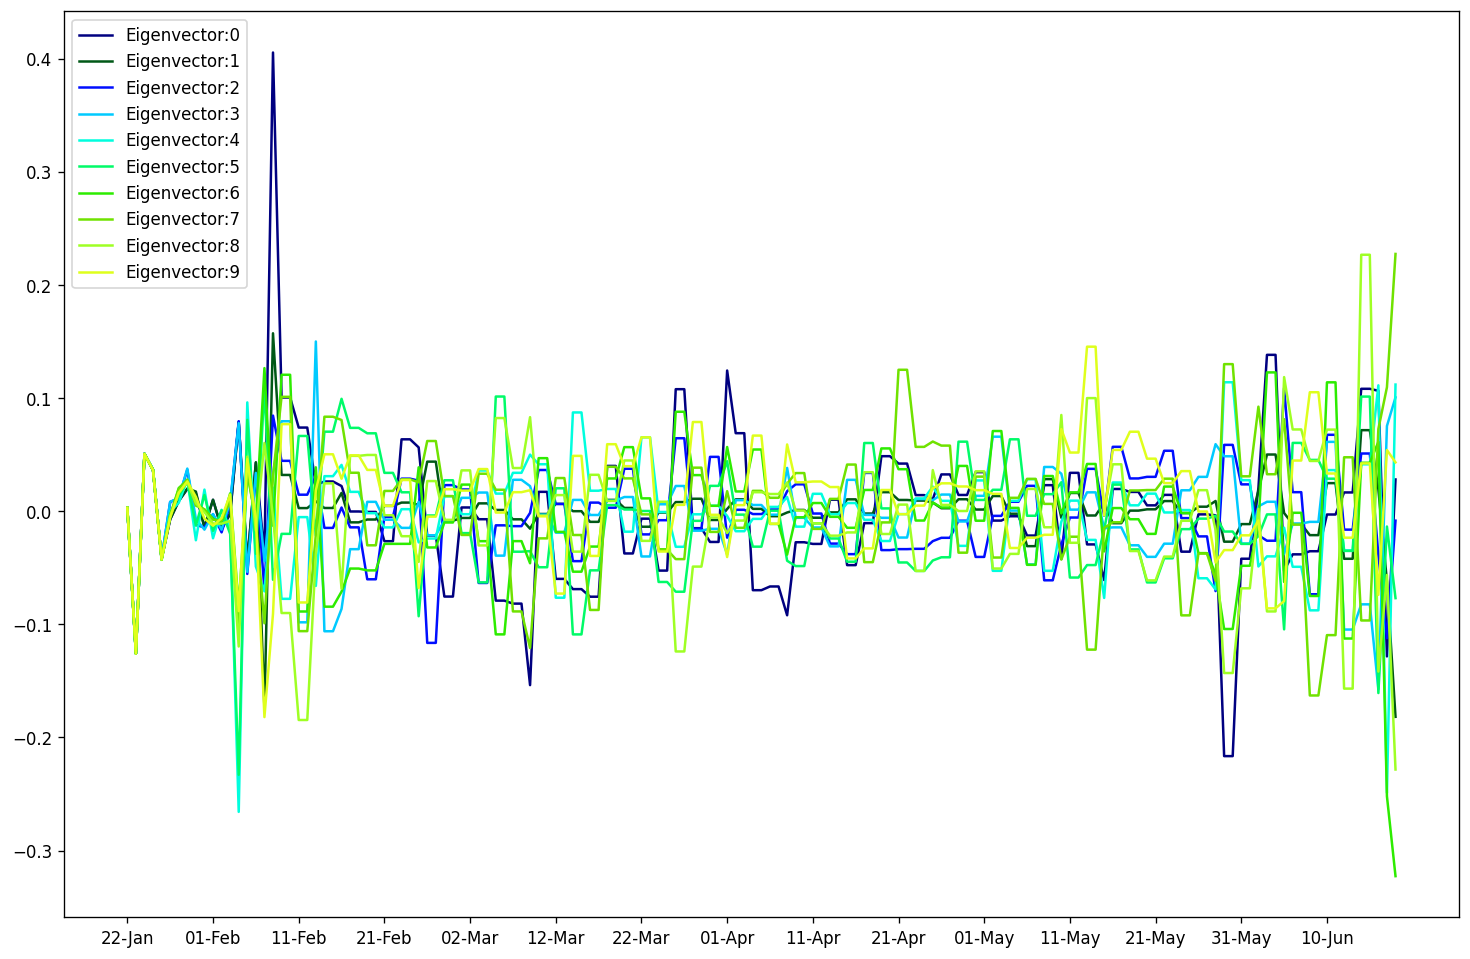

In [ ]:
import matplotlib.cm as cm

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,17)]  

plt.figure(figsize=(15,10))

plt.xticks(np.arange(0,len(scaled_features_df.T),10), scaled_features_df.T.index[0:len(scaled_features_df.T):10])

ys = []
for i in range(0, 10): 
  ys.append(eigenVectors[i])
  plt.plot(x, ys[i], label="Eigenvector:{}".format(i), color=colorst[i])
  plt.legend()

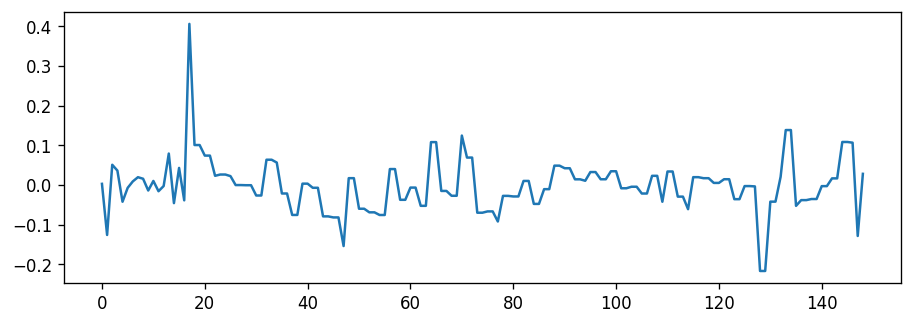

In [ ]:
plt.plot(eigenVectors[0])

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

Number of PCs to get less than 1% RMSE error:13


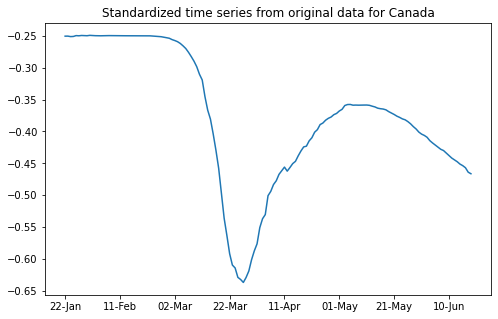

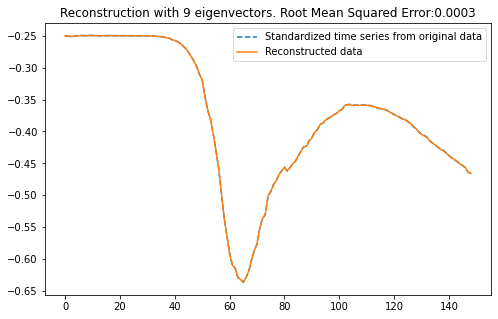

In [ ]:
country_name = 'Canada'


num_components = get_num_components_for_lte_1pc_rmse(country_name)
print("Number of PCs to get less than 1% RMSE error:{}".format(num_components))

plt.figure(figsize=(8,5))
plt.xticks(np.arange(0,len(scaled_features_df.T),20), scaled_features_df.T.index[0:len(scaled_features_df.T):20])
plt.plot(scaled_features_df.loc[country_name])
plt.title("Standardized time series from original data for {}".format(country_name))

X_std=np.array(scaled_features_df.loc[country_name])

y_actual = X_std


PC_count = num_components

W = eigenVectors[:, 0:PC_count]
projX = np.dot(X_std, W)
ReconX = np.dot(projX, W.T)

y_predicted = ReconX.real

residual_error = y_actual - y_predicted
rms = round(sqrt(mean_squared_error(y_actual, y_predicted)),4)

plt.figure(figsize=(8,5))
plt.plot(X_std, label="Standardized time series from original data", linestyle='dashed')
plt.plot(ReconX, label="Reconstructed data")
plt.title("Reconstruction with {} eigenvectors. Root Mean Squared Error:{}".format(i, rms))
plt.legend()




In [ ]:
W.shape

(149, 13)

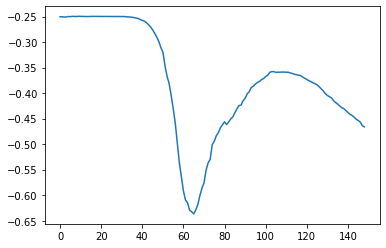

In [ ]:
plt.plot(ReconX)


### **Setting up our baseline model**
The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

### **Order of $d$ (Differencing order)**
Under the a perfectly stationary process, the autocorrelation function should behave like the delta function, which is the case at the second differencing. Therefore, we'll set $d=2$.

In [ ]:
eigenVectors[0].real

array([ 2.81553211e-03, -1.25858524e-01,  5.08214847e-02,  3.62081959e-02,
       -4.21909326e-02, -7.29046358e-03,  8.94560168e-03,  1.95414560e-02,
        1.56066696e-02, -1.39611939e-02,  1.01033031e-02, -1.57653814e-02,
       -2.67870076e-03,  7.90665933e-02, -4.57314791e-02,  4.28980041e-02,
       -3.87192441e-02,  4.05441530e-01,  1.00485665e-01,  1.00485665e-01,
        7.39120567e-02,  7.39120567e-02,  2.30369322e-02,  2.62506743e-02,
        2.62506743e-02,  2.22213817e-02, -2.68253565e-04, -2.68253565e-04,
       -6.69320163e-04, -6.69320163e-04, -2.65340058e-02, -2.65340058e-02,
        6.35147798e-02,  6.35147798e-02,  5.63695249e-02, -2.14833537e-02,
       -2.14833537e-02, -7.54796893e-02, -7.54796893e-02,  3.27187676e-03,
        3.27187676e-03, -7.11561123e-03, -7.11561123e-03, -7.90783357e-02,
       -7.90783357e-02, -8.17114298e-02, -8.17114298e-02, -1.53768527e-01,
        1.70910559e-02,  1.70910559e-02, -5.98489519e-02, -5.98489519e-02,
       -6.88978202e-02, -

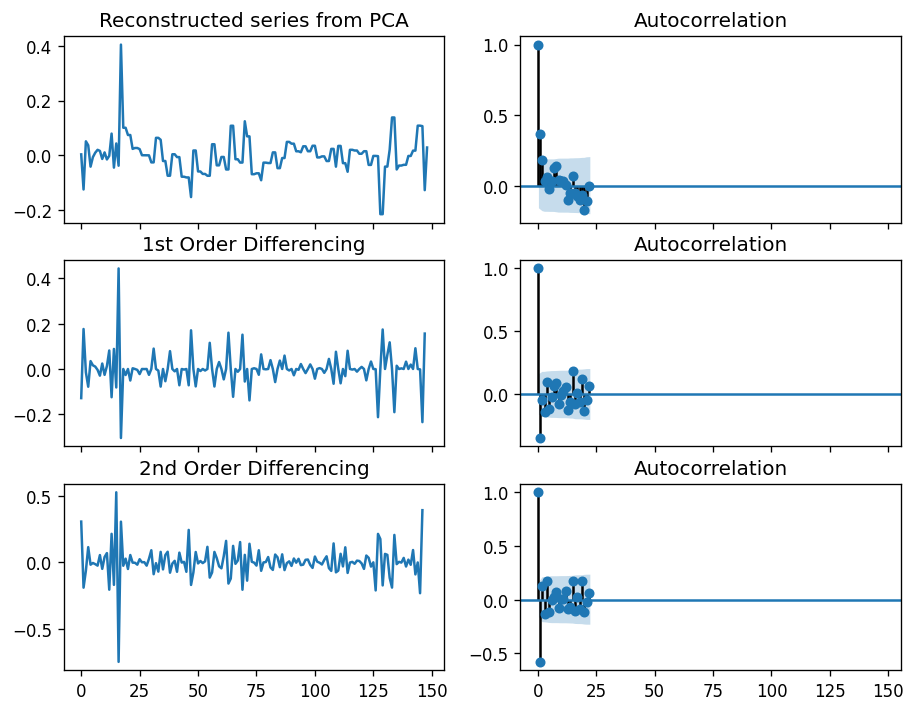

In [ ]:
input_series = eigenVectors[0].real
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(input_series); axes[0, 0].set_title('Reconstructed series from PCA')
plot_acf(input_series, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(input_series)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(input_series), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(input_series))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(input_series)), ax=axes[2, 1])

plt.show()


### **Order of $p$ (AR term)**
As we can see on the charts below, there were very few values above the significance line, so we'll leave $p=1$.

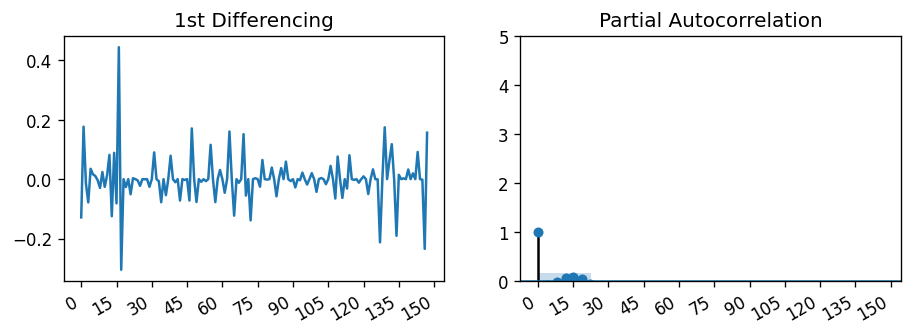

In [ ]:

import statsmodels.api as sm
import matplotlib.ticker as mticker

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(input_series)); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

##Spacing out ticks every 7 values 
myLocator = mticker.MultipleLocator(15)
axes[0].xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

plot_pacf(np.diff(input_series), ax=axes[1])
plt.show()

### **Order of q (MA term)**
A couple of lags are above our significance line, so we'll leave $q =1$

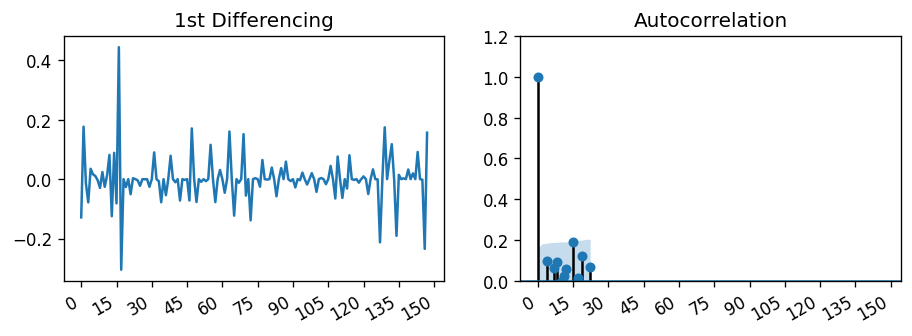

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(input_series)); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
##Spacing out ticks every 7 values 
myLocator = mticker.MultipleLocator(15)
axes[0].xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()
plot_acf(np.diff(input_series), ax=axes[1])

plt.show()

In [ ]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [ ]:

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:

series = pd.Series(input_series)
series.index = scaled_features_df.columns
series.shape

(149,)

**Now we'll split dataset in training and validation**

In [ ]:

validation_size =round(len(series)*.2)
split_point = len(series) -validation_size 

print("The size of our validation set is: {}, which corresponds to 20% of our examples.".format(validation_size))

dataset, validation = series[0:split_point], series[split_point:]

print("The training set goes from {} to {} and the validation set goes from {} to {}".format(dataset.index[0], dataset.index[-1], validation.index[0], validation.index[-1] ))

The size of our validation set is: 30, which corresponds to 20% of our examples.
The training set goes from 22-Jan to 19-May and the validation set goes from 20-May to 18-Jun


In [ ]:
scaled_features_df.columns

Index(['22-Jan', '23-Jan', '24-Jan', '25-Jan', '26-Jan', '27-Jan', '28-Jan',
       '29-Jan', '30-Jan', '31-Jan',
       ...
       '09-Jun', '10-Jun', '11-Jun', '12-Jun', '13-Jun', '14-Jun', '15-Jun',
       '16-Jun', '17-Jun', '18-Jun'],
      dtype='object', length=149)

In [ ]:

from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 14
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,2,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  103
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  60.410
Method:                       css-mle   S.D. of innovations              0.134
Date:                Mon, 13 Jul 2020   AIC                           -114.819
Time:                        00:26:41   BIC                           -106.915
Sample:                             2   HQIC                          -111.618
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.008     -0.032      0.975      -0.016       0.015
ar.L1.D2.y    -0.6920      0.074     -9.347      0.000      -0.837      -0.547
                                    Roots           

**The residual errors seem fine with near zero mean and uniform variance.**

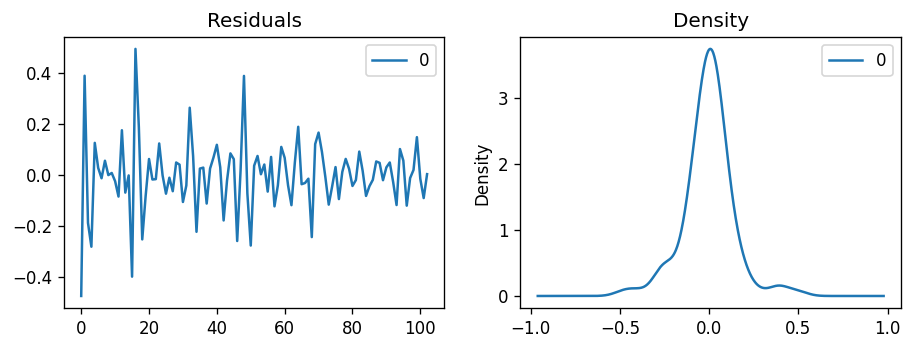

In [ ]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

 ### **One-step out of sample forecast**

In [ ]:

# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [ ]:
series.loc['19-May']

0.01702149183465046

In [ ]:
series.loc['20-May']

0.005155357297568735

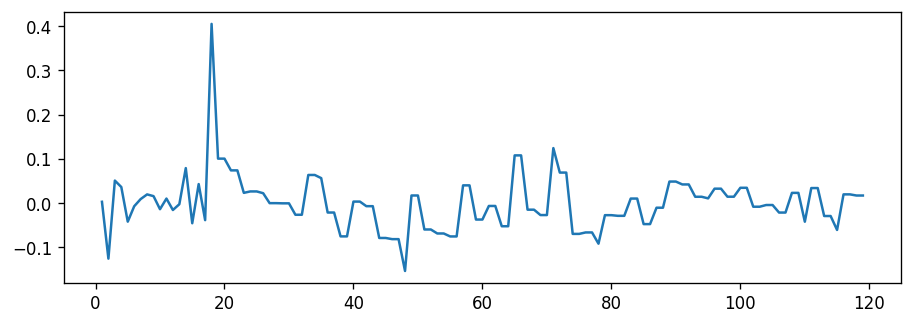

In [ ]:
plt.plot(np.arange(1,120), series.iloc[0:119])

In [ ]:
from pandas import datetime
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: -0.026425


In [ ]:
forecast

array([-0.02642463])

## **multi-step out-of-sample forecast**

In [ ]:
# multi-step out-of-sample forecast
num_steps = 10
forecast, se, confidence_interval = model_fit.forecast(steps=num_steps, alpha=0.05)

In [ ]:
series.iloc[119:129]

20-May    0.005155
21-May    0.005155
22-May    0.014413
23-May    0.014413
24-May   -0.035793
25-May   -0.035793
26-May   -0.002830
27-May   -0.002830
28-May   -0.003643
29-May   -0.216525
dtype: float64

In [ ]:
forecast

array([ 0.01662879,  0.01470614,  0.01031918,  0.00721651,  0.00280413,
       -0.00112293, -0.00580683, -0.010388  , -0.01546126, -0.02061499])

In [ ]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: -0.004920
Day 2: -0.006843
Day 3: 0.033311
Day 4: 0.030209
Day 5: -0.039452
Day 6: 0.032769
Day 7: 0.028085
Day 8: -0.039765
Day 9: -0.044838
Day 10: -0.081544


In [ ]:
validation[:num_steps]

20-May    0.005155
21-May    0.005155
22-May    0.014413
23-May    0.014413
24-May   -0.035793
25-May   -0.035793
26-May   -0.002830
27-May   -0.002830
28-May   -0.003643
29-May   -0.216525
dtype: float64

In [ ]:
print("For the next {} days, from {} the values forecasted are: {}. \nThe true values (from reconstruction) are:{} ".format(num_steps, dataset.index[-1], history[-num_steps:], validation[:num_steps]))

For the next 10 days, from 19-May the values forecasted are: [-0.004920413388631275, -0.006843064028363249, 0.033311307564288094, 0.030208642930483372, -0.03945158058828217, 0.032769389460945375, 0.028085488885990356, -0.03976475091477019, -0.04483800577680088, -0.08154358960660897]. 
The true values (from reconstruction) are:20-May    0.005155
21-May    0.005155
22-May    0.014413
23-May    0.014413
24-May   -0.035793
25-May   -0.035793
26-May   -0.002830
27-May   -0.002830
28-May   -0.003643
29-May   -0.216525
dtype: float64 


In [ ]:
eigenVectors[0]

array([ 2.81553211e-03+0.00000000e+00j, -1.25858524e-01+0.00000000e+00j,
        5.08214847e-02+0.00000000e+00j,  3.62081959e-02+0.00000000e+00j,
       -4.21909326e-02+0.00000000e+00j, -7.29046358e-03+0.00000000e+00j,
        8.94560168e-03+0.00000000e+00j,  1.95414560e-02+0.00000000e+00j,
        1.56066696e-02+0.00000000e+00j, -1.39611939e-02+0.00000000e+00j,
        1.01033031e-02+0.00000000e+00j, -1.57653814e-02+0.00000000e+00j,
       -2.67870076e-03+0.00000000e+00j,  7.90665933e-02+0.00000000e+00j,
       -4.57314791e-02+0.00000000e+00j,  4.28980041e-02+0.00000000e+00j,
       -3.87192441e-02+0.00000000e+00j,  4.05441530e-01+0.00000000e+00j,
        1.00485665e-01+1.30270074e-01j,  1.00485665e-01-1.30270074e-01j,
        7.39120567e-02-1.33493773e-02j,  7.39120567e-02+1.33493773e-02j,
        2.30369322e-02+0.00000000e+00j,  2.62506743e-02+6.04140975e-02j,
        2.62506743e-02-6.04140975e-02j,  2.22213817e-02+0.00000000e+00j,
       -2.68253565e-04+9.03101243e-05j, -2.68253565

### **Predicting cases from May 19 to June 18 and comparing against validation data**

In [ ]:
np.array(history[-num_steps:])

array([-0.46886419, -0.47197593, -0.4747316 , -0.47617339, -0.47939646,
       -0.48249065, -0.48554615])

In [ ]:
scaled_features = StandardScaler().fit_transform(df.values)

In [ ]:
StandardScaler().inverse_transform(np.array(history[-num_steps:]))

NotFittedError: ignored

ValueError: ignored

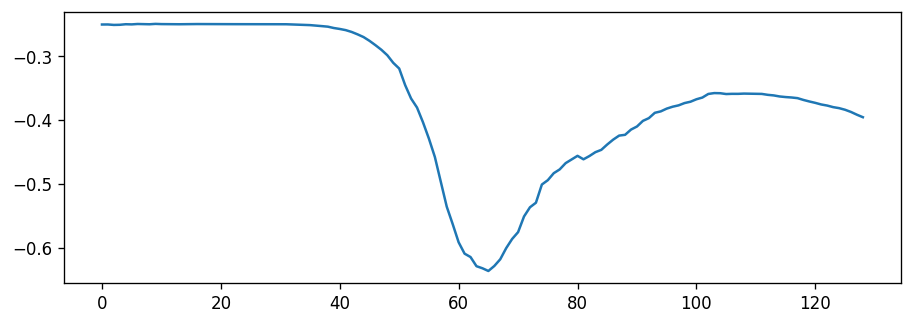

In [ ]:
plt.plot(np.arange(0,129), series.iloc[:129], label='Cases from reconstructed series')
plt.plot(np.arange(119,129),history[-num_steps:],label='Predicted')
plt.legend()

### **Using this model to predict from June 18 to June 25**

In [ ]:
dataset= series

In [ ]:

from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 14
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,2,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  133
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 468.623
Method:                       css-mle   S.D. of innovations              0.007
Date:                Sun, 12 Jul 2020   AIC                           -931.246
Time:                        22:31:22   BIC                           -922.575
Sample:                             2   HQIC                          -927.723
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.995e-06      0.000      0.007      0.995      -0.001       0.001
ar.L1.D2.y    -0.3558      0.081     -4.412      0.000      -0.514      -0.198
                                    Roots           

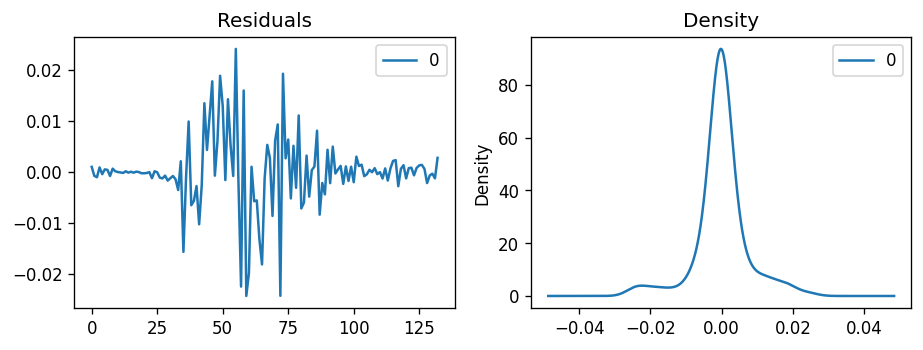

In [ ]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
# multi-step out-of-sample forecast
num_steps = 7
forecast, se, confidence_interval = model_fit.forecast(steps=num_steps, alpha=0.05)

In [ ]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: -0.468864
Day 2: -0.471976
Day 3: -0.474732
Day 4: -0.476173
Day 5: -0.479396
Day 6: -0.482491
Day 7: -0.485546


In [ ]:
print("For the next {} days, from {} the values forecasted are: {}. \nThe true values (from reconstruction) are:{} ".format(num_steps, dataset.index[-1], history[-num_steps:], validation[:num_steps]))

For the next 7 days, from 18-Jun the values forecasted are: [-0.4688641921759628, -0.4719759252119886, -0.4747316040304965, -0.4761733937527455, -0.4793964633225722, -0.48249064819391785, -0.4855461479485242]. 
The true values (from reconstruction) are:Series([], dtype: float64) 


In [ ]:
history[-num_steps:]

[-0.4688641921759628,
 -0.4719759252119886,
 -0.4747316040304965,
 -0.4761733937527455,
 -0.4793964633225722,
 -0.48249064819391785,
 -0.4855461479485242]

In [ ]:
mu = rawdf['18-Jun'].mean()
sigma =  rawdf['18-Jun'].std()

In [ ]:
mu = rawdf.loc['Canada'].mean()
sigma =  rawdf.loc['Canada'].std()

In [ ]:
rawdf.loc[['Canada']]

22-Jan  23-Jan  24-Jan  25-Jan  ...  15-Jun  16-Jun  17-Jun  18-Jun
Countries                                  ...                                
Canada          0       0       0       0  ...  100763  101087  101491  101877

[1 rows x 149 columns]

In [ ]:
(101855-mu)/sigma

1.7637279164044648

In [ ]:
scaled_features_df.loc[['Canada']]

22-Jan    23-Jan    24-Jan  ...    16-Jun    17-Jun    18-Jun
Countries                                ...                              
Canada    -0.250484 -0.250413 -0.251154  ... -0.456871 -0.463879 -0.466313

[1 rows x 149 columns]

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


